In [1024]:
import numpy as np
from random import randint, choices
import matplotlib.pyplot as plt

In [1025]:
image_dimensions = {"height": 200, "width": 200}
no_shapes = 3
shape_radius = 20
noise_level = 50 # larger -> less noise

getting simulated input

In [1026]:
image = np.zeros((image_dimensions["height"], image_dimensions["width"]))

In [1027]:
shapes = []
for i in range(no_shapes):
  centre = (randint(0, image_dimensions["width"]-1), randint(0, image_dimensions["height"]-1))
  shapes.append([centre, shape_radius])

In [1028]:
shapes

[[(78, 194), 20], [(34, 2), 20], [(98, 119), 20]]

In [1029]:
for y in range(len(image)):
  for x in range(len(image[y])):
    for shape in shapes:
      distance = ((y - shape[0][1])**2 + (x - shape[0][0])**2)**0.5
      if distance <= shape[1] and randint(1, int(noise_level/(distance+1))) != 1 or randint(1, noise_level*10) == 1:
        image[y,x] = 1

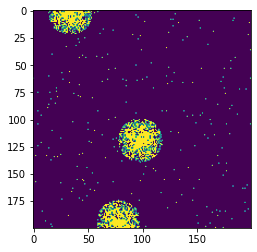

In [1030]:
imgplot = plt.imshow(image)

k means code

In [1031]:
def k_means(image, k, epochs):

  points = []

  for y in range(len(image)):
    for x in range(len(image[y])):
      if image[y,x] == 1:
        points.append([(y,x), 0])

  centres = choices(points, k=k)

  for i in range(epochs):

    for point in points:
      distances = np.array([((point[0][0] - centre[0][0])**2 + (point[0][1] - centre[0][1])**2)**0.5 for centre in centres])
      group = np.argmin(distances)
      point[1] = group

    # find centres
    group_totals = [[0, 0] for i in range(k)]
    group_numbers = [0 for i in range(k)]
    for point in points:
      group_totals[point[1]][0] += point[0][0]
      group_totals[point[1]][1] += point[0][1]
      group_numbers[point[1]] += 1

    centres = []
    for group in range(len(group_totals)):
      try:
        centres.append([(group_totals[group][0]/group_numbers[group], (group_totals[group][1]/group_numbers[group])), group])
      except:
        centres.append([(0,0), group])

  loss = 0
  for point in points:
    distances = np.array([((point[0][0] - centre[0][0])**2 + (point[0][1] - centre[0][1])**2)**0.5 for centre in centres])
    loss += min(distances)

  return (points, centres, loss)

k means code, but with mutliple starting points and then taking best one

In [1032]:
def k_means_max(image, k, epochs, n):

  outputs = []

  for i in range(n):

    points = []

    for y in range(len(image)):
      for x in range(len(image[y])):
        if image[y,x] == 1:
          points.append([(y,x), 0])

    centres = choices(points, k=k)

    for i in range(epochs):

      for point in points:
        distances = np.array([((point[0][0] - centre[0][0])**2 + (point[0][1] - centre[0][1])**2)**0.5 for centre in centres])
        group = np.argmin(distances)
        point[1] = group

      # find centres
      group_totals = [[0, 0] for i in range(k)]
      group_numbers = [0 for i in range(k)]
      for point in points:
        group_totals[point[1]][0] += point[0][0]
        group_totals[point[1]][1] += point[0][1]
        group_numbers[point[1]] += 1

      centres = []
      for group in range(len(group_totals)):
        try:
          centres.append([(group_totals[group][0]/group_numbers[group], (group_totals[group][1]/group_numbers[group])), group])
        except:
          centres.append([(0,0), group])

    loss = 0
    for point in points:
      distances = np.array([((point[0][0] - centre[0][0])**2 + (point[0][1] - centre[0][1])**2)**0.5 for centre in centres])
      loss += min(distances)

    outputs.append((points, centres, loss))

  best_loss = 1e10
  best_output = "error -> increase best loss"
  for output in outputs:
    if output[2] < best_loss:
      best_loss = output[2]
      best_output = output

  return best_output

k means with correct no. shapes

36117.34790573368


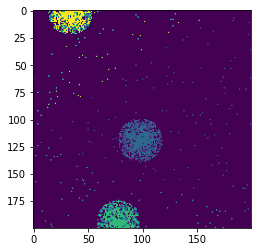

In [1033]:
temp_image = np.zeros((image_dimensions["height"], image_dimensions["width"]))
points, centres, loss = k_means(image, no_shapes, 10)
for point in points:
  temp_image[point[0][0], point[0][1]] = point[1] + 1
imgplot = plt.imshow(temp_image)
print(loss)

In [1034]:
a=[26571.088162477165,
28499.57288285993,
33980.49655353595,
42335.097427388304,
148716.13399650375]

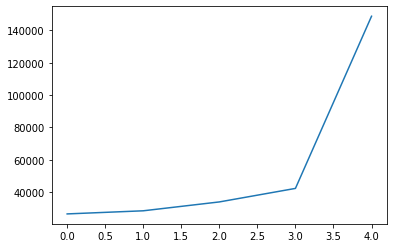

In [1035]:
plt.plot(a)

k means with finding 2nd derivative of loss curve to get no. shapes

3


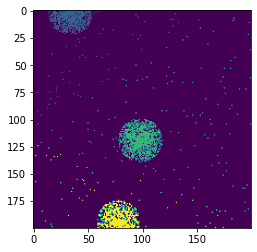

In [1036]:
loss = []
for i in range(10):
  loss.append(k_means(image, i+1, 10)[2])

derivatives = []
for i in range(len(loss)-1):
  derivatives.append(abs(loss[i]-loss[i+1]))

second_derivatives = []
for i in range(len(derivatives)-1):
  second_derivatives.append(abs(derivatives[i]-derivatives[i+1]))

k = np.argmax(np.asarray(second_derivatives)) + 2

points, centres, loss = k_means(image, k, 20)

temp_image = np.zeros((image_dimensions["height"], image_dimensions["width"]))
for point in points:
  temp_image[point[0][0], point[0][1]] = point[1] + 1
imgplot = plt.imshow(temp_image)
print(k)

k means with best answer and finding 2nd derivative of loss curve to get no. shapes

No. objects: 3
Centres:  (36.39, 12.29), (102.21, 116.22), (77.99, 187.11)


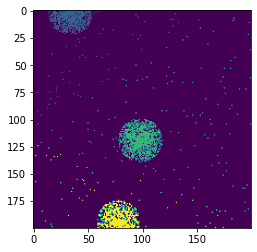

In [1037]:
loss = []
for i in range(10):
  loss.append(k_means_max(image, i+1, 10, 5)[2])

derivatives = []
for i in range(len(loss)-1):
  derivatives.append(abs(loss[i]-loss[i+1]))

second_derivatives = []
for i in range(len(derivatives)-1):
  second_derivatives.append(abs(derivatives[i]-derivatives[i+1]))

third_derivatives = []
for i in range(len(second_derivatives)-1):
  third_derivatives.append(second_derivatives[i]-second_derivatives[i+1])

k = np.argmax(np.asarray(third_derivatives)) + 2

points, centres, loss = k_means_max(image, k, 15, 5)

temp_image = np.zeros((image_dimensions["height"], image_dimensions["width"]))
for point in points:
  temp_image[point[0][0], point[0][1]] = point[1] + 1
imgplot = plt.imshow(temp_image)

print(f"No. objects: {k}\nCentres: " + "".join([f", ({round(centre[0][1], 2)}, {round(centre[0][0], 2)})" for centre in centres])[1:])

graphs

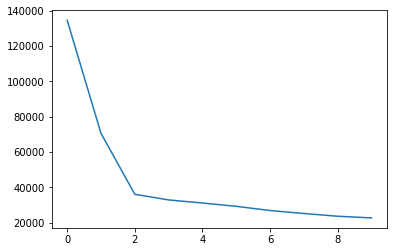

In [1038]:
loss = []
for i in range(10):
  loss.append(k_means_max(image, i+1, 10, 5)[2])
plt.plot(loss)

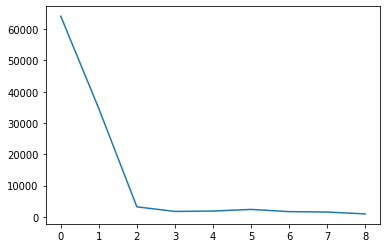

In [1039]:
derivatives = []
for i in range(len(loss)-1):
  derivatives.append(loss[i]-loss[i+1])
plt.plot(derivatives)

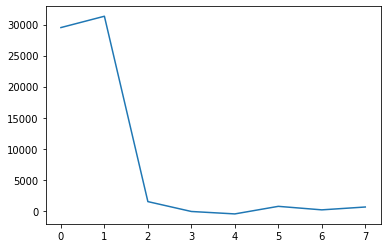

In [1040]:
second_derivatives = []
for i in range(len(derivatives)-1):
  second_derivatives.append(derivatives[i]-derivatives[i+1])
plt.plot(second_derivatives)

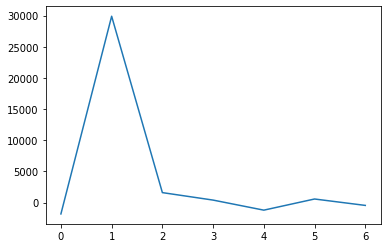

In [1041]:
third_derivatives = []
for i in range(len(second_derivatives)-1):
  third_derivatives.append(second_derivatives[i]-second_derivatives[i+1])
plt.plot(third_derivatives)

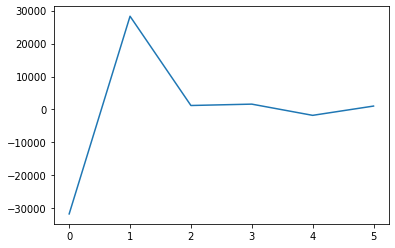

In [1042]:
fourth_derivatives = []
for i in range(len(third_derivatives)-1):
  fourth_derivatives.append(third_derivatives[i]-third_derivatives[i+1])
plt.plot(fourth_derivatives)

No. objects: 3
Centres:  (102.21, 116.22), (77.99, 187.11), (36.39, 12.29)


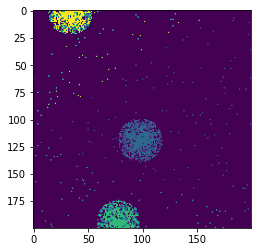

In [1043]:
k = np.argmax(np.asarray(third_derivatives)) + 2

points, centres, loss = k_means_max(image, k, 15, 5)

temp_image = np.zeros((image_dimensions["height"], image_dimensions["width"]))
for point in points:
  temp_image[point[0][0], point[0][1]] = point[1] + 1
imgplot = plt.imshow(temp_image)

print(f"No. objects: {k}\nCentres: " + "".join([f", ({round(centre[0][1], 2)}, {round(centre[0][0], 2)})" for centre in centres])[1:])